In [1]:
pip install bing-image-downloader


In [2]:
from bing_image_downloader import downloader
downloader.download("sunflower",limit=5,output_dir="images",
                    adult_filter_off=True)

[%] Downloading Images to d:\realstorage\a\sts\end project\svm hard work\images\sunflower


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-EvQYk5Z2ISQ/TV1Y6C9VAlI/AAAAAAAAADA/0PviOUYUjU8/s1600/Sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.howtogrowstuff.com/wp-content/uploads/Sunflowers.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://upload.wikimedia.org/wikipedia/commons/4/40/Sunflower_sky_backdrop.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://gardeningafterfive.files.wordpress.com/2010/06/sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://2.bp.blogspot.com/-YKC_GFdOmDU/UEG_40h7krI/AAAAAAAACEo/uLz7k5aA9Ys/s1600/sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://images4.fanpop.com/image/photos/22200000/sunflower-flowers-22283987-1680-1050.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://upload.w

In [3]:
downloader.download("lily",limit=50,output_dir="images",
                    adult_filter_off=True)

[%] Downloading Images to d:\realstorage\a\sts\end project\svm hard work\images\lily


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://fthmb.tqn.com/LCyupmFhZf0tXxj6TpBwWS6ZSfo=/3867x2578/filters:fill(auto,1)/GettyImages-153342142-56a75f045f9b58b7d0e9bee6.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://2.bp.blogspot.com/-qR9_NsqjM2Q/UHwl8YEd7uI/AAAAAAAAV44/UJ6nqkiFFHE/s1600/stargazer_lily_edited.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapers-all.com/uploads/posts/2016-11/7_lily.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://2.bp.blogspot.com/-IIPmMsDRXo8/Ujm4pmuNaKI/AAAAAAAAlnM/GzTbSlHNO2M/s1600/Asiatic+Lily+1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://1.bp.blogspot.com/_flwyXYLUJtQ/S4vog7eaYpI/AAAAAAAAAD0/9gojf0Scf88/s1600/Lily1.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.almanac.com/sites/default/files/image_nodes/oriental-lily.j

In [4]:
downloader.download("Jasmine flower",limit=50,output_dir="images",
                    adult_filter_off=True)

[%] Downloading Images to d:\realstorage\a\sts\end project\svm hard work\images\Jasmine flower


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://cdn.shopify.com/s/files/1/1419/7120/products/Philippine_Jasmine-2.SHUT.jpg?v=1532466088
[%] File Downloaded !

[%] Downloading Image #2 from http://upload.wikimedia.org/wikipedia/commons/1/1f/Jasmine_flowers_190605_kpjas.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapercave.com/wp/BNHQh4x.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i1.wp.com/www.theayurveda.org/wp-content/uploads/2015/08/Jasmine-flower.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://cdn.shopify.com/s/files/1/1419/7120/products/Philippine_Jasmine-1.ETGB.jpg?v=1559234475
[%] File Downloaded !

[%] Downloading Image #6 from https://petalsandwings.files.wordpress.com/2013/09/orange-jasmine-5-1.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.bhg.com.au/me

Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

Jasmine flower       1.00      1.00      1.00         1
     sunflower       1.00      1.00      1.00         1

      accuracy                           1.00         2
     macro avg       1.00      1.00      1.00         2
  weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


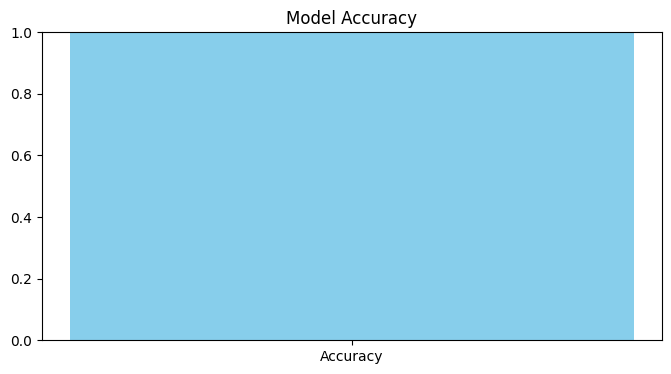

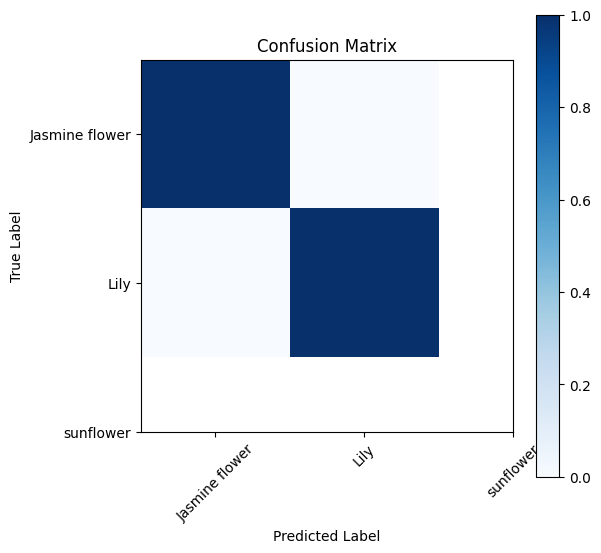

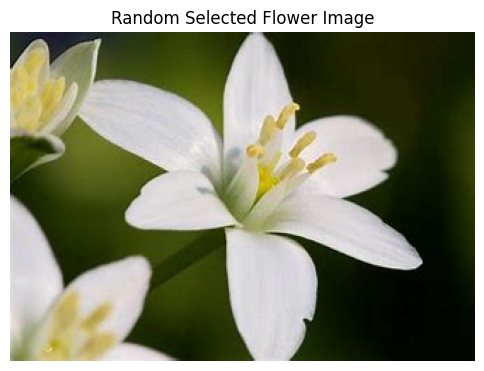

Predicted category for the random image: Lily


In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
from skimage.io import imshow
# Load flower images
DATADIR = 'D:\\project\\svm\\images'


CATEGORIES = [ 'Jasmine flower', 'Lily','sunflower']

# Initialize empty lists for features and labels
features = []
labels = []

# Load and preprocess images
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))  # Resize to consistent size
        features.append(img_resized.flatten())  # Flatten image array
        labels.append(category)

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(kernel='linear')
model.fit(x_train, y_train)

# Evaluate model performance
y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Accuracy
plt.figure(figsize=(8, 4))
plt.bar(["Accuracy"], [accuracy_score(y_test, y_pred)], color="skyblue")
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.show()

# Plot Classification Report
# print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap="Blues", interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(range(len(CATEGORIES)), CATEGORIES, rotation=45)
plt.yticks(range(len(CATEGORIES)), CATEGORIES)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Predict category for a random flower image
random_image = imread('D:\\OIP (1).jpg')
# print(random_image)
# random_image = imread(random_image_path)

# Display the selected random image
plt.figure(figsize=(6, 6))
plt.imshow(random_image)
plt.title("Random Selected Flower Image")
plt.axis('off')  # Hide axis for better visualization
plt.show()
random_image_resized = resize(random_image, (150, 150, 3))
random_feature = random_image_resized.flatten()
predicted_category = model.predict([random_feature])[0]
print("Predicted category for the random image:", predicted_category)
